## Information

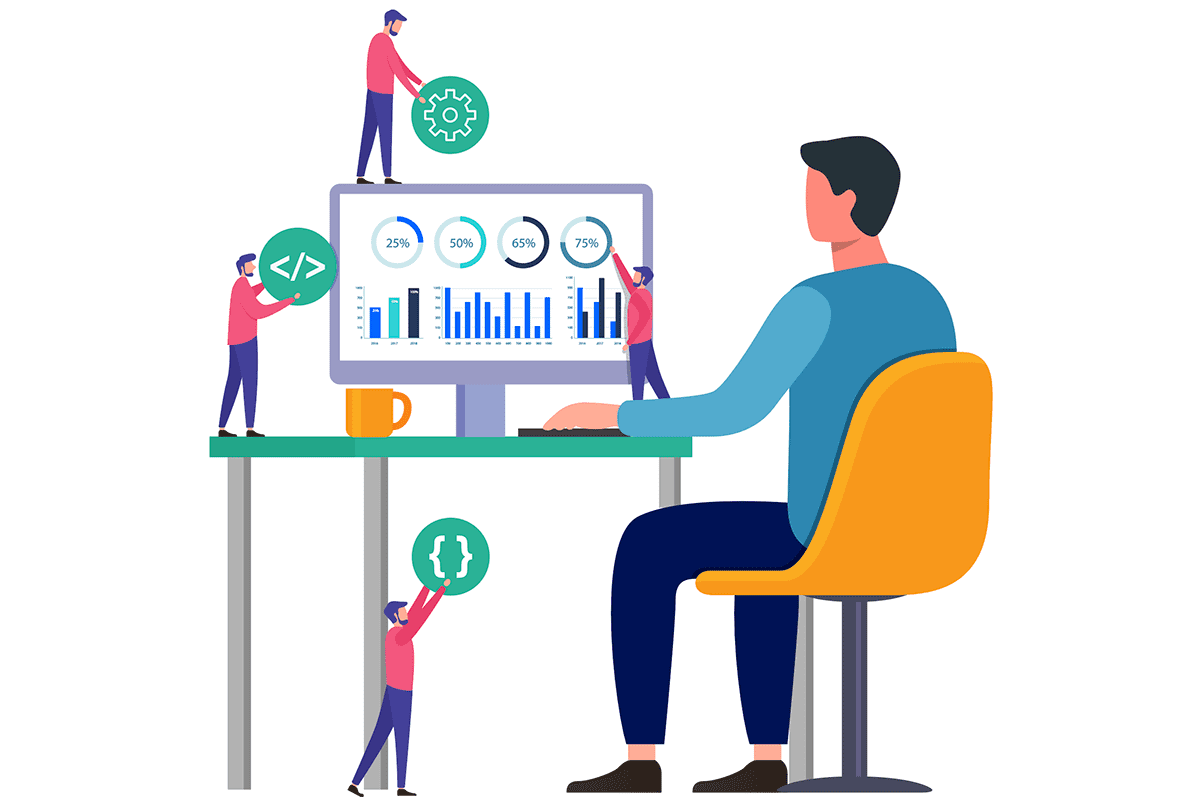

In [81]:
#@title 
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "front_image.jpg", width=800, height=400)

In this project I scraped job postings related to Data Science field from www.glassdoor.com. This project is inspired by Ken Jee (https://github.com/PlayingNumbers). I have used a modified version of Ken Jee's selenium code because that code was not working raw for me. Selenium was used because it has small chance of getting caught by glassdoor as it mimics a human kind of interaction. Sending too many request could still increase chances of getting IP block, this limited the dataset to only 1000 jobs.

With each job, we get the following information:

- Job title
- Salary Estimate
- Job Description
- Rating
- Company
- Location
- Company Headquarters
- Company Size
- Company Founded Date
- Type of Ownership
- Industry
- Sector
- Revenue
- Competitors

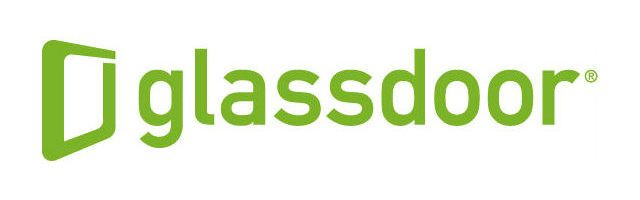

In [1]:
Image(filename = "image.jpg", width=400, height=200)

Glassdoor is a website where current and former employees anonymously review companies. Glassdoor also allows users to anonymously submit and view salaries as well as search and apply for jobs on its platform.Glassdoor launched its site in 2008 , as a site that “collects company reviews and real salaries from employees of large companies and displays them anonymously for all members to see,” according to TechCrunch. The company then averaged the reported salaries, posting these averages alongside the reviews employees made of the management and culture of the companies they worked for—including some of the larger tech companies like Google and Yahoo. The site also allows the posting of office photographs and other company-relevant media.

## Information about the Dataset (AFTER CLEANING)
1. Job Title: The title of job, eg. Data scientist, junior data scientist, senior data scientist etc.
2. Salary Estimate: Range of salary and the source.
3. Job Description: Tells us what is expected out of the job title.
4. Rating: It gives the rating of the company
5. Company Name: Name of the company
6. Location: Location of the job
7. Headquarters: location of headquarter of the company
8. Size: Range of number of employee working in the company
9. Founded: Company founded in Year
10. Type of ownership: Tells us if the company is private, public or government owned.
11. Industry: Industry of the company
12. Sector: Sector in which company works
13. Revenue: Total revennue of the company per year
14. Competitors: Current competitor of the company in the same sector
15. Hourly - Tells us if the salary reported was hourly or yearly. 1: Hourly, 0: not hourly.
16. Employer provided: 1: If the salary was provided by the employee of the company, 0: otherwise.
17. Lower Salary: Lower salary reported for the job in a particular company.
18. Uppr Salary: Upper salary reported for the job in a particular company.
19. Avg Salary(K): Average of Lower and Upper salary yearly. K is the unit of the column, it means 1000. Also, the slaary is in ($) U.S. dollars.
20. company_txt: It contains the name of the company.
21. Multiple skill columns (python, spark, aws, excel etc): 1: Skill is required by the company, 0: It is not required.
22. Jobtitle_sim: It contains the title of the job like Data scientist, ML engineer etc.
23. seniority_by_title: Senority of the position, it is extracted from the Job Title.
24. Degree: If the job description mention that the company gives experience credit for a master(M) or Ph.D degree(P).

## Credits
1. Ken Jee - https://github.com/PlayingNumbers
2. Ezequiel Starecinch - https://github.com/echestare/001KenJeeFromScratch_DSSalary

## Motivation:

I am a Physicist who is planning to transition into the Data Science field, to make my decision crystal clear I thought it would be a great thing to go through one of the best review sites Glassdoor to see the salary of the employee, and the expectations of the company from a data science employee. The requirements put out by the company will help me understand the skills that I need to develop before I apply for a job. This was the motivation behind the project.

## Flow:

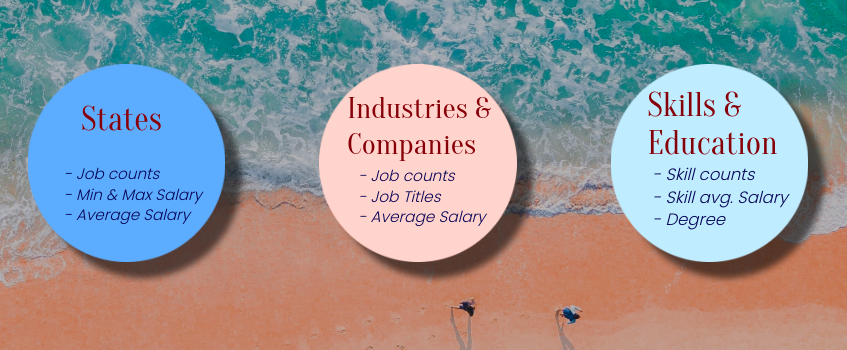

In [2]:
#@title
Image(filename = "flow.png", width=1000, height=400)

## Questions:

1. States with Most Number of Jobs.
2. Average Minimal and Maximal Salaries in Different States.
3. Average Salary in Different States.
4. Top 5 Industries with Maximum Number of Data Science Related Job Postings.
5. Companies with Maximum Number of Job Openings.
6. Job Titles with Most Number of Jobs.
7. Salary of Job Titles with Most Number of Jobs.
8. Skills Required by Companies for Each Job Title.
9. Relation between Average Salary and Education.

## (A) Data Wrangling

To answer the above question, the raw data was scraped from Glassdoor in a CSV format and then I read the downloaded CSV file through pandas. Prior to any use, the datasets must be conditioned into formats which are more easily manipulated during the investigation. This includes removing invalid entries, correcting salary records reported in hourly format instead of yearly format, extracting other factors like degree required etc. This is **already done** in the data cleaning notebook and now I will be using the cleaned csv file for the analysis.

Selenium code, raw datafile and Data cleaning notebook can be found [here](https://github.com/dsNikhilds).

## (B) Exploratory Data Analysis

The approach is to inspect each categorical variable and look for direct correlations with the salary distribution as well as between themself.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing all the neccessary libraries

import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
#import plotly  #  interactive plotting library 

In [5]:
# Loading the dataset into the pandas dataframe (cleaned dataset)

df = pd.read_csv("data_cleaned_2021.csv")
df = df.drop("index",axis=1) # I droped the 'index' column because I don't need it.

In [6]:
# Display the first few rows of the dataframe.
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M


### Looking at basic information about the dataset

In [7]:
# Lets look at the shape of the dataset

print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 742
No. of columns in the dataset: 41


In [8]:
# Scanning the dataset for missing values.

df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

There are no null values, the df.info() also says the same.

In [9]:
# Looking at some overall information and statistics about the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

This shows the name of all the columns, and which columns have null values. The data types used are: int, float and object. It also tells us about the no. of columns of each data type.

In [10]:
# Provide a summary of the numerical information...

df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This gives us a overall look at how the data is distributed for numerical columns.
1. Average lower salary is about \$75K pa. We see 75% of the jobs positing has minimum salary =< than \$91K pa, so it doesn't look like the mean value is affected much by the outlier(\$15K or $202K pa).
2. Average maximum salary is around \$128K pa. We see 75% of the jobs positing has maximum salary =< than \$155K pa, so it doesn't look like the mean value is affected much by the outlier(\$16K or \$306K pa).
3. Mean Avg. salary is about \$101K pa.

I will look at these columns separately later in the notebook.

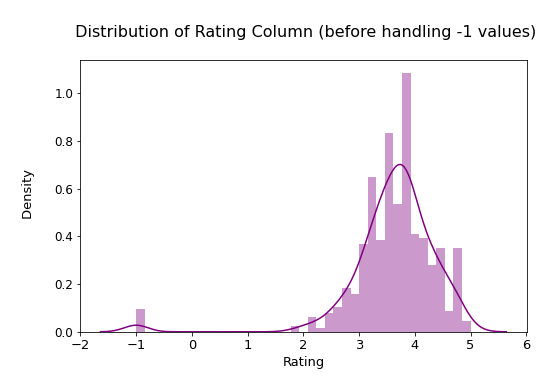

In [11]:
# Lets look at how the 'Rating' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.Rating,color="purple")
plt.show()

It follows a normal distribution, therefore we can replace -1 values with the mean of the distribution.

In [12]:
# Replacing the -1 values in 'Rating' column with nan value.

df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==-1 else x)

# Fill missing values with the mean of the distribution.

df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

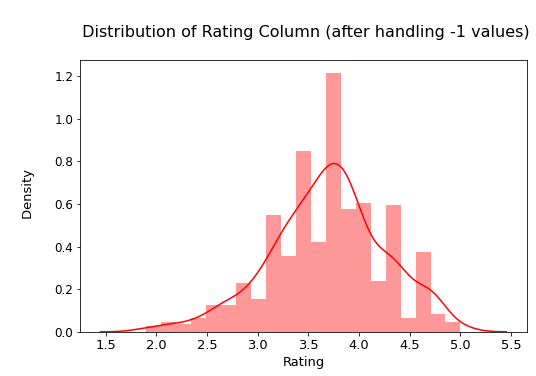

In [13]:
# Verifying that the replace function worked properly for the 'Rating' column.

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (after handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["Rating"],kde=True,color="red")
plt.show()

4. Most of the companies are rated between 3.5 - 4 (~3.7).

<Figure size 576x360 with 0 Axes>

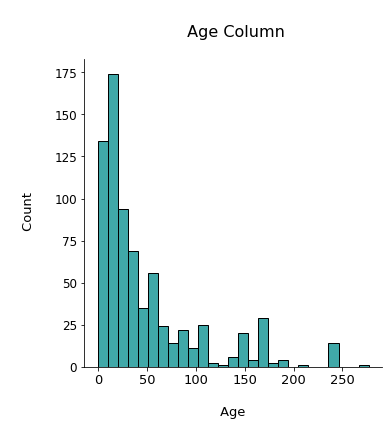

In [14]:
# Looking at the 'Age' column.

plt.figure(figsize=(8,5))
a = sns.displot(df.Age,color="darkcyan")
plt.title('\n Age Column\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

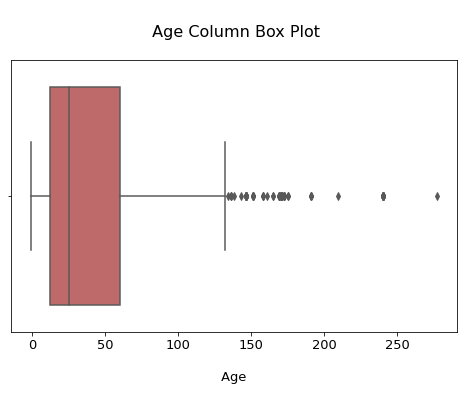

In [15]:
# To see any outliers in the 'Age' column.

plt.figure(figsize=(8,5))
sns.boxplot(df.Age,color="indianred")
plt.title('\n Age Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

5. It shows there are many outliners in the Age column, so the mean value of Age can't be trusted as it will be clearly biased towards the outliers.

#### **Visualization of jobs in different states of U.S.**


The dataset doesn't have Longitude and Latitude information required for visualizations on a US map.
So, I am adding a Long, Lat US dataset into the main dataframe.
Source: https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations

In [16]:
# Importing the dataset and dropping columns that is not needed.
#I changed a column name from "State" to "Job Location" because this will help me in merging the two dataframes together.
df2 = pd.read_csv("statelatlong.csv").rename(columns={"State":"Job Location"})
#Dropping the \column that is not required.
df2 = df2.drop("City",axis=1)
#Looking at first few records.
df2.head(5)

,Job Location,Latitude,Longitude
0,AL,32.601011,-86.680736
1,AK,61.302501,-158.775020
2,AZ,34.168219,-111.930907
3,AR,34.751928,-92.131378
4,CA,37.271875,-119.270415


State abbrevations can be found here: https://www.ssa.gov/international/coc-docs/states.html

In [17]:
#Merging the two datasets based on "Job Location" column.
df = df.merge(df2, on='Job Location')

In [18]:
#Lets see if it works
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Latitude,Longitude
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,34.166232,-106.026069
1,Data Scientist,$56K-$95K (Glassdoor est.),"Sartorius Stedim Data Analytics, a market lead...",3.5,Sartorius\n3.5,"Albuquerque, NM","Gottingen, Germany",5001 - 10000,1870,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $2 billion (USD),-1,0,0,56,95,75.5,Sartorius,NM,151,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,34.166232,-106.026069


It worked, Latitude and Longitude columns are there at the very end. We can now start visualizing them on a map.

In [19]:
#Most of the libraries are pre installed in google colab but not all.
%pip install geopandas --quiet #installing Geopandas library quitly i.e. without any output

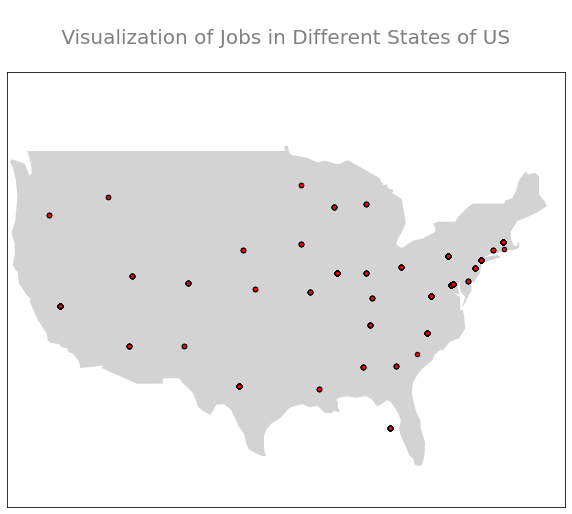

In [20]:
#Importing the GeoPandas library.
import geopandas as gpd
#Geopandas lets you load the geometry for countries worldwide into an object called GeoDataFrame.
fig, ax = plt.subplots(figsize=(10,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
# Since our focus is on US, we can slice the “countries” object so it shows us US only:
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)
#Now we put points on it.
df.plot(x="Longitude", y="Latitude", kind="scatter",c="red",edgecolor="black", ax=ax)
plt.xlabel("")
plt.ylabel("")
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
plt.title('\n Visualization of Jobs in Different States of US \n', size=20, color='grey');
plt.show()


In [21]:
# We see few markers on the map, lets see how many unique state values are there.
df["Job Location"].nunique()

37

6. 37 unique states are present in the whole dataset, that's why we see 37 markers on the map.
7. Also, we see more point on the boundary of the country map becauise more people live in the coastal areas as compared to rest of the US.

Lets begin the exploratory data analysis by looking at how the jobs are distributed among different states.

## 1. States with Most Number of Jobs.

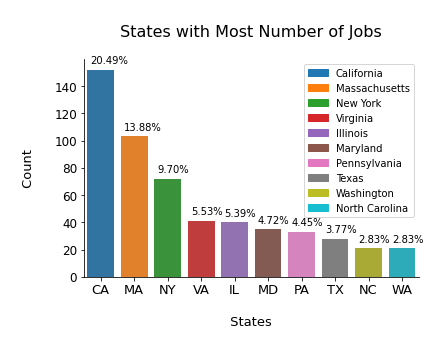

In [22]:
#Adding labels for the states
lab=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

from IPython.core.pylabtools import figsize
#Lets look at the top 10 states with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df["Job Location"].value_counts().index[0:10], y = df["Job Location"].value_counts()[0:10])

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["Job Location"].value_counts().index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+4.5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()

8. California has the most number of jobs.
9. It is obvious for California to have most number of jobs as it is a hub for Tech. companies and has silicon valley.
10. Calfornia, Massachusetts, New York, Virginia together has around 50% jobs
11. Massachusetts on 2nd rank is no surprise, according to latest edition of the Milken Institute’s State and Technology Index, it has now become the tech state of US. Source: https://www.geekwire.com/2020/chart-new-report-ranks-top-states-tech/
12. One surprising thing is, despite having the largest number of Fortune 500 companies HQ in New York, it is still on 3rd position.


Next, let's look at the minimal and maximal average salary per annum in these states.

## 2. Average Minimal and Maximal Salaries in Different States.

Lets look at the average annual minimal and maximum salary in states with most number of jobs.

In [23]:
# Making a dataframe with only 3 columns: Job Location, Lower Salary and Upper Salary.

a=df.groupby("Job Location")["Lower Salary","Upper Salary"].mean().reset_index()

In [24]:
#Making a sorter, to sort the dataframe according to the states which contains maximum number of jobs.

sorter = df["Job Location"].value_counts().index

In [25]:
sorter

Index(['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA', 'NJ', 'FL',
       'OH', 'TN', 'DC', 'CO', 'UT', 'IN', 'WI', 'MO', 'AZ', 'AL', 'DE', 'KY',
       'GA', 'MI', 'CT', 'IA', 'NE', 'OR', 'LA', 'NM', 'KS', 'ID', 'MN', 'RI',
       'SC'],
      dtype='object')

In [26]:
# Converting Job Location column as Category and setting the sorter.
# Thanks to Stackoverflow. Source = https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

a["Job Location"] = a["Job Location"].astype("category")
a["Job Location"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index

a = a.sort_values(["Job Location"]).reset_index()
a = a.drop("index",axis=1)

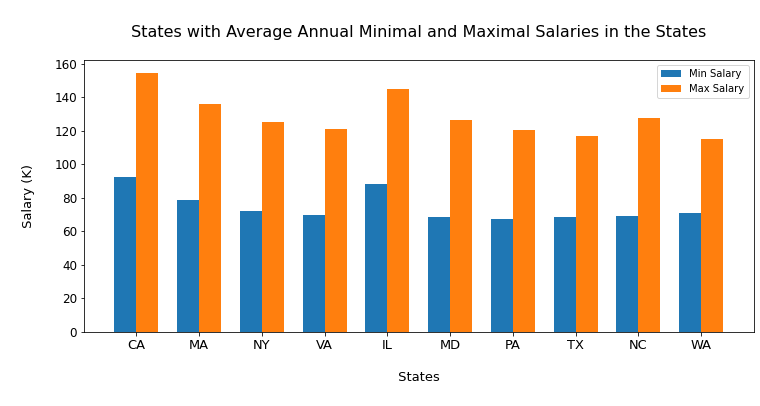

In [27]:
# Drawing the grouped bar plot.

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, a["Lower Salary"][0:10], width, label='Min Salary')
rects2 = ax.bar(x + width/2, a["Upper Salary"][0:10], width, label='Max Salary')

#Beautifying the plot
plt.title('\n States with Average Annual Minimal and Maximal Salaries in the States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')

ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend()
plt.show()


13. State with highest number of job, California also offers the highest average maximal annual salary, followed by Illinois.
14. Both California and Illinois has almost the same average minimal annual salary.
15. Pennsylvania has the lowest average minimum annual salary among the top 10 states.
16. Washington has the lowest average maximum annual salary among the top 10 states.

It will be interesting to see the average annual salary among the top 10 states.

##3. Average Salary in Different States.

Let's first look at the average annual salary for different states.

In [28]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = df.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Job Location":"Job Location","Avg Salary(K)":"Average Salary"})

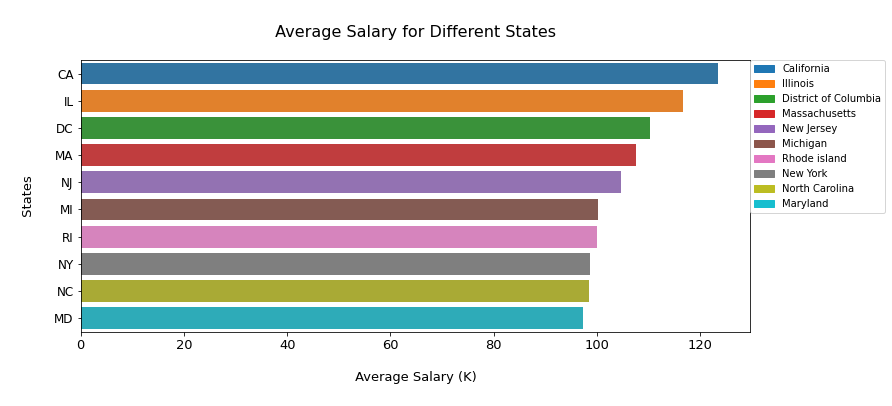

In [29]:
# Plotting the average salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Job Location", x = "Average Salary",data=g)

#Beautifying the plot

plt.title('\n Average Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [30]:
# To show all the records
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

pd.pivot_table(df, index = ['Job Location','job_title_sim'], values = 'Avg Salary(K)', aggfunc = 'count').sort_values('Job Location', ascending = False)


Avg Salary(K)
Job Location job_title_sim                                
WI           other scientist                             4
             data scientist                              3
             analyst                                     3
WA           other scientist                             1
             data scientist                             17
             analyst                                     3
VA           machine learning engineer                   2
             data scientist                             23
             data engineer                              10
             analyst                                     6
UT           data scientist                              3
             data engineer                               3
             analyst                                     4
TX           data engineer                               8
             data scientist                             13
             other scientist                             7
TN           data scientist                              1
             data engineer                              10
             analyst                                     2
SC           other scientist                             1
RI           analyst                                     1
PA           other scientist                             6
             machine learning engineer                   7
             data scientist                             10
             data engineer                               1
             analyst                                     8
             Data scientist project manager              1
OR           data scientist                              3
             data engineer                               1
OH           data scientist                              7
             analyst                                     4
             other scientist                             3
NY           other scientist                            10
             machine learning engineer                   2
             data scientist                             40
             data modeler                                1
             data engineer                               4
             data analitics                              1
             analyst                                    14
NM           data scientist                              3
NJ           Data scientist project manager              2
             other scientist                             1
             data scientist                              6
             data engineer                               2
             analyst                                     6
NE           other scientist                             4
NC           other scientist                            12
             data scientist                              3
             data engineer                               6
MO           other scientist                             1
             na                                          2
             data scientist                              3
             analyst                                     2
             Data scientist project manager              1
MN           data engineer                               1
             analyst                                     1
MI           data scientist                              4
             Data scientist project manager              2
MD           other scientist                            12
             data scientist                             13
             na                                          3
             data modeler                                1
             data engineer                               3
             analyst                                     3
MA           other scientist                            39
             na                                          2
             director            

17. California has the highest average annual salary, followed by Illinois. This could be beacuse there are 74 job postings in California for Data scientists which are highly paid (shown later).
18. Maryland has the lowest average annual salary because it is hiring less number of people and the jobs are also distributed among high salary and low salary job titles.
19. Average Salary of California is twice the average salary of Alabama, Delaware, South Carolina, Idaho, Louisiana and Nebraska.


Lets look at the average salary reported by top 10 states with most no. of jobs.

In [31]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = df.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)
g = g.reset_index().rename(columns={"Job Location":"Job Location","Avg Salary(K)":"Average Salary"})

# Converting Job Location column as Category and setting the sorter.
# Thanks to Stackoverflow. Source = https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

g["Job Location"] = g["Job Location"].astype("category")
g["Job Location"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index

g = g.sort_values(["Job Location"]).reset_index()
g = g.drop("index",axis=1)


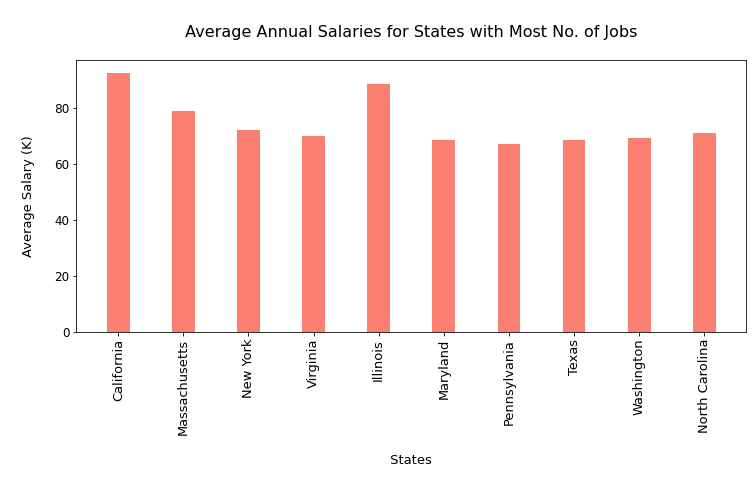

In [32]:
#Drawing bar plot of average salaries reported by top 10 states with most no. of jobs.
labe=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x, a["Lower Salary"][0:10], width, label='Min Salary',color="salmon")

#Beautifying the plot

plt.title('\n Average Annual Salaries for States with Most No. of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(labe)
plt.show()

20. California has the highest average annual salary among all 10 states, followed by Illinois.
21. Pennsylvania, Texas and Washington has almost the same annual average salary.
22. Only 3 out of 10 states, California, Massachusetts and Illinois, have average annual salary more than $100K.
23. Overlap of 6/10 states between top 10 states reporting highest annual average salary and top 10 states where job postings are maximum. 
24. Even though District of Columbia, New Jersey, Michigan and Rhode Island are not in top 10 states with highest number of jobs, those states still offers an average annual salary of greater than 100,000\$.

Now, let's look at industry column, I will find the industry with maximum number of job postings related to data science.

## 4. Top 5 Industries with Maximum Number of Data Science Related Job Postings.

In [33]:
#Lets see how many industries we have in the dataset.

df["Industry"].nunique()

60

Ofc, we can't make a plot with all the industries. So, I will be choosing the top 5 industries for insights.

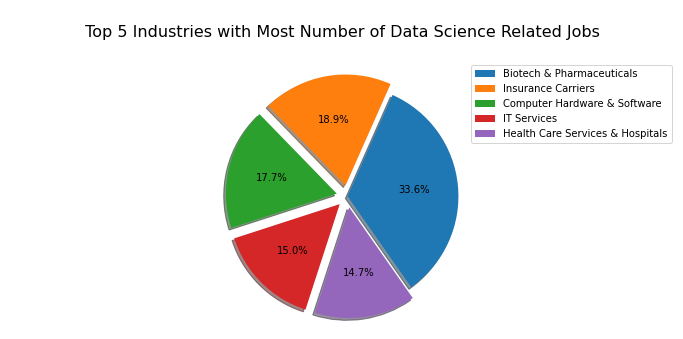

In [34]:
#Plotting pie chart

my_explode=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 Industries with Most Number of Data Science Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [35]:
for (i,j) in zip(df["Industry"].value_counts().sort_values(ascending=False)[0:10],range(0,10)):
  print(" Percentage of jobs in {}  :  {:.2f}%".format(df["Industry"].value_counts().sort_values(ascending=False).index[j],(i/742)*100 ))

 Percentage of jobs in Biotech & Pharmaceuticals  :  15.09%
 Percentage of jobs in Insurance Carriers  :  8.49%
 Percentage of jobs in Computer Hardware & Software  :  7.95%
 Percentage of jobs in IT Services  :  6.74%
 Percentage of jobs in Health Care Services & Hospitals  :  6.60%
 Percentage of jobs in Enterprise Software & Network Solutions  :  5.66%
 Percentage of jobs in Internet  :  3.91%
 Percentage of jobs in Consulting  :  3.91%
 Percentage of jobs in Aerospace & Defense  :  3.37%
 Percentage of jobs in Advertising & Marketing  :  3.37%


25. Biotech & Pharmaceuticals Industry has maximum number of jobs followed by Insurance carriers.
26. As a surprise, IT industry has fewer jobs for data science related roles.
27. More than 65% data science related jobs lie in top 10 industries.
28. For this dataset, Biotech & Pharmaceuticals Industry has twice the amount of jobs compared to IT services industry.
29. It looks like Heath Care Services & Hospitals industry is hiring at a good rate because they almost surpassed the IT services industry.

Lets take a look at the minimum and maximum average salary for top 5 industries.

In [36]:
# Making a sorter, to sort the index with Industries having highest number of data science related jobs

sort_ind = df["Industry"].value_counts().sort_values(ascending=False).index

In [37]:
#Making a DF and sortring it w.r.t. sort_ind

ind = df.groupby("Industry")["Lower Salary","Upper Salary"].mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind = ind.drop("index",axis=1)
ind.head(2)


,Industry,Lower Salary,Upper Salary
0,Biotech & Pharmaceuticals,79.883929,144.357143
1,Insurance Carriers,77.793651,133.460317


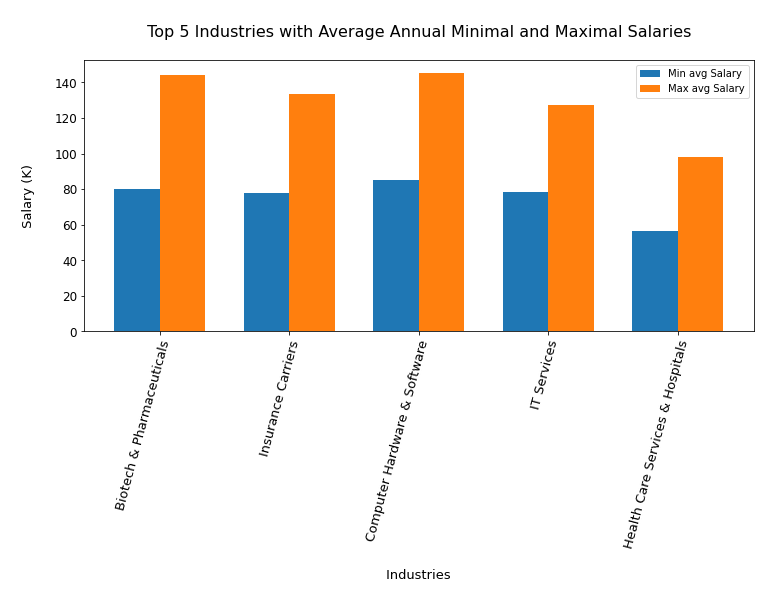

In [38]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()


30. Computer Hardware & Software Industry has the highest average maximal salary among the 5 selected industries, it is followed by Biotech & Pharmaceuticals.
31. Computer Hardware & Software Industry also has the highest average minimal salary among the 5 selected industries, it is followed by Biotech & Pharmaceuticals.
32. Health Care Services & Hospitals industry has the lowest average maximal and minimal salary among the 5 selected industries.
33. Telecommunications Manufacturing Industry has the lowest average minimum and maximum salary among all the industries.
34. Financial Analytics & Research industry has the highest average minimum salary among all the industries.
35. Motion Picture Production & Distribution industry has the highest average maximum salary among all the industries.
36. The average maximum salary of Motion Picture Production & Distribution industry is 3.3 times of the Telecommunications Manufacturing Industry's average maximum salary.
37. The average minimum salary of Financial Analytics & Research industry is 3.6 times of the Telecommunications Manufacturing Industry's average minimum salary.

In [39]:
# Tooking at the job postings in each industry, to find any outliers.

df["Industry"].value_counts().sort_values(ascending=False).tail(10)

Auctions & Galleries                        1
Mining                                      1
Health Care Products Manufacturing          1
Accounting                                  1
Motion Picture Production & Distribution    1
Beauty & Personal Accessories Stores        1
Transportation Equipment Manufacturing      1
Farm Support Services                       1
Other Retail Stores                         1
Health, Beauty, & Fitness                   1
Name: Industry, dtype: int64

Motion Picture Production & Distribution Industry has only 1 job posting in the whole dataset (total 742 records), the reliability of this record is questionable. It can be treated as an outlier.

After looking at the industry, it makes sense to see which company has the maximum number of job postings related to data science.

## 5. Companies with Maximum Number of Job Openings

In [40]:
# Top 10 companies with maximum number of job postings.

df["company_txt"].value_counts().sort_values(ascending=False).head(10)

Reynolds American                   14
Takeda Pharmaceuticals              14
MassMutual                          14
Software Engineering Institute      11
PNNL                                10
Liberty Mutual Insurance            10
AstraZeneca                          9
MITRE                                8
Fareportal                           7
Advanced BioScience Laboratories     7
Name: company_txt, dtype: int64

In [41]:
# Total number of companies

df.company_txt.nunique()

343

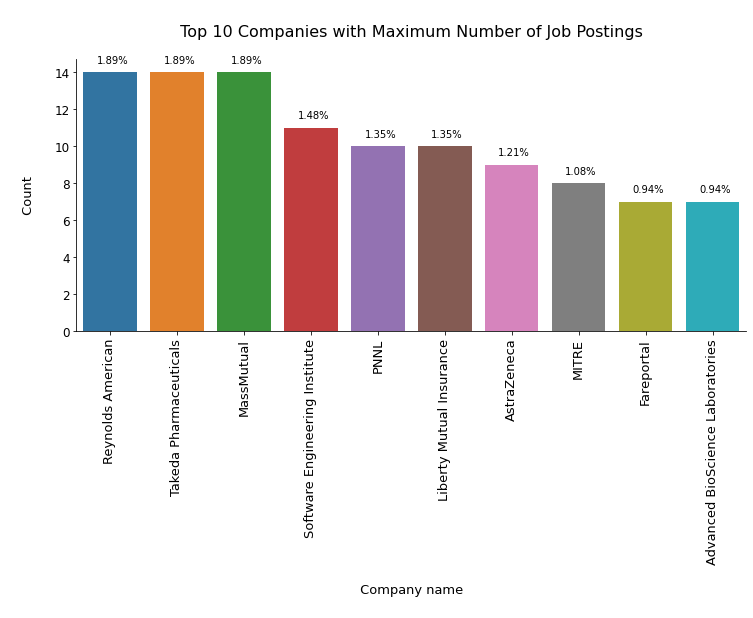

In [42]:
# Viualizing the above information

from IPython.core.pylabtools import figsize
#Lets visualize the top 10 companies with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= df["company_txt"].value_counts().sort_values(ascending=False).head(10).index ,y= df["company_txt"].value_counts().sort_values(ascending=False).head(10))

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["company_txt"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.2, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot
plt.title('\n Top 10 Companies with Maximum Number of Job Postings \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

38. There are total 342 companies in the dataset. This is why there is less number of job postings by each company.
39. Reynolds American, MassMutrual and Takeda Pharmaceuticals company tops the list with 14 job postings related to data science.
40. In the previous plot, we also saw that a Pharmaceutical Industry was leading with the most number of job postings, we see the same trend here in this findings too. The industry also offered the highest minimum and maximum annual salary. It clearly shows that the demand of data science experts in this industry is increasing.


We can further look at the minimal and maximal salaries for these companies.

In [43]:
# Making a sorter, to sort the index with companies having highest number of data science related jobs

sort_com = df["company_txt"].value_counts().sort_values(ascending=False).index

In [44]:
#Making a DF and sortring it w.r.t. sort_com

com = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
com = com.reset_index()

# Converting company_txt column as Category and setting the sorter.

com["company_txt"] = com["company_txt"].astype("category")
com["company_txt"].cat.set_categories(sort_com, inplace=True)

#Resetting and droping the index

com = com.sort_values(["company_txt"]).reset_index()
com = com.drop("index",axis=1)
com.head(5)


,company_txt,Lower Salary,Upper Salary
0,Reynolds American,66.500000,129.785714
1,Takeda Pharmaceuticals,94.285714,170.285714
2,MassMutual,70.142857,131.071429
3,Software Engineering Institute,73.272727,142.727273
4,PNNL,65.100000,109.000000


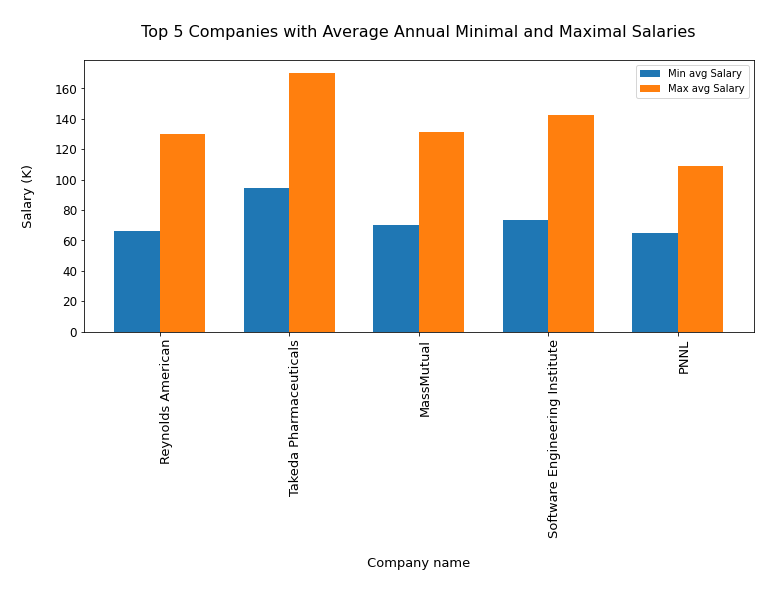

In [45]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_com[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, com["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, com["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()


41. Again, we see that a Pharmaceuticals Company offers the highest minimal and maximal annual salary.

Lets look at the top 5 company minimal and maximal salaries in top 5 states with most number of job postings. The top 5 states with maximum job postings related to data science are: Calfornia(CA), Massachusetts(MA), New York(NY), Virginia(VA) and Illinois(IL).

In [46]:
#@title Before Visualization code
# I need to first find the top 5 companies with maximum job postings in those states.

a1=df[df["Job Location"]=="CA"].copy() # It will only copy those records where Job Location is CA.
s1 = a1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for a1.

b1=df[df["Job Location"]=="MA"].copy() # It will only copy those records where Job Location is MA.
s2 = b1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for b1.

c1=df[df["Job Location"]=="NY"].copy() # It will only copy those records where Job Location is NY.
s3 = c1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for c1.

d1=df[df["Job Location"]=="VA"].copy() # It will only copy those records where Job Location is VA.
s4 = d1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for d1.

e1=df[df["Job Location"]=="IL"].copy() # It will only copy those records where Job Location is IL.
s5 = e1["company_txt"].value_counts().sort_values(ascending=False).index #This will act as a sorter for e1.

#Making a DF and sortring it w.r.t. s1
ca = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ca = ca.reset_index()

# Converting company_txt column as Category and setting the sorter.

ca["company_txt"] = ca["company_txt"].astype("category")
ca["company_txt"].cat.set_categories(s1, inplace=True)

#Resetting and droping the index

ca = ca.sort_values(["company_txt"]).reset_index()
ca = ca.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s2
ma = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ma = ma.reset_index()

# Converting company_txt column as Category and setting the sorter.

ma["company_txt"] = ma["company_txt"].astype("category")
ma["company_txt"].cat.set_categories(s2, inplace=True)

#Resetting and droping the index

ma = ma.sort_values(["company_txt"]).reset_index()
ma = ma.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s3
ny = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
ny = ny.reset_index()

# Converting company_txt column as Category and setting the sorter.

ny["company_txt"] = ny["company_txt"].astype("category")
ny["company_txt"].cat.set_categories(s3, inplace=True)

#Resetting and droping the index

ny = ny.sort_values(["company_txt"]).reset_index()
ny = ny.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s4
va = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
va = va.reset_index()

# Converting company_txt column as Category and setting the sorter.

va["company_txt"] = va["company_txt"].astype("category")
va["company_txt"].cat.set_categories(s4, inplace=True)

#Resetting and droping the index

va = va.sort_values(["company_txt"]).reset_index()
va = va.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s5
il = df.groupby("company_txt")["Lower Salary","Upper Salary"].mean().sort_values("company_txt",ascending=False)
il = il.reset_index()

# Converting company_txt column as Category and setting the sorter.

il["company_txt"] = il["company_txt"].astype("category")
il["company_txt"].cat.set_categories(s5, inplace=True)

#Resetting and droping the index

il = il.sort_values(["company_txt"]).reset_index()
il = il.drop("index",axis=1)


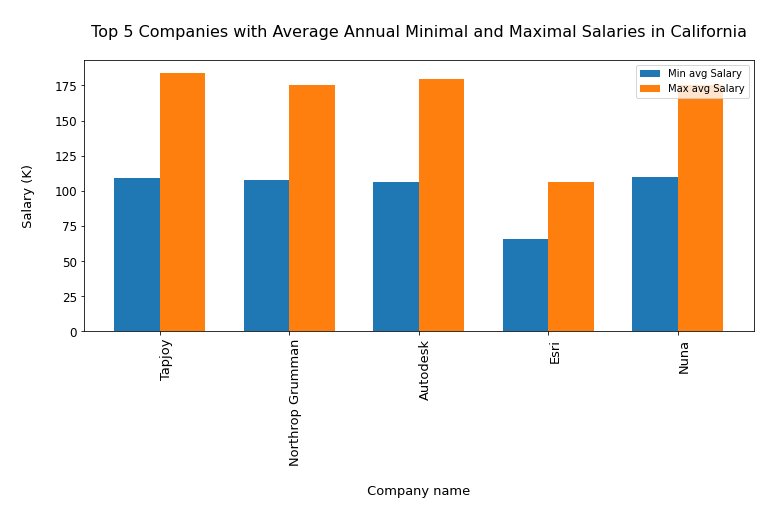

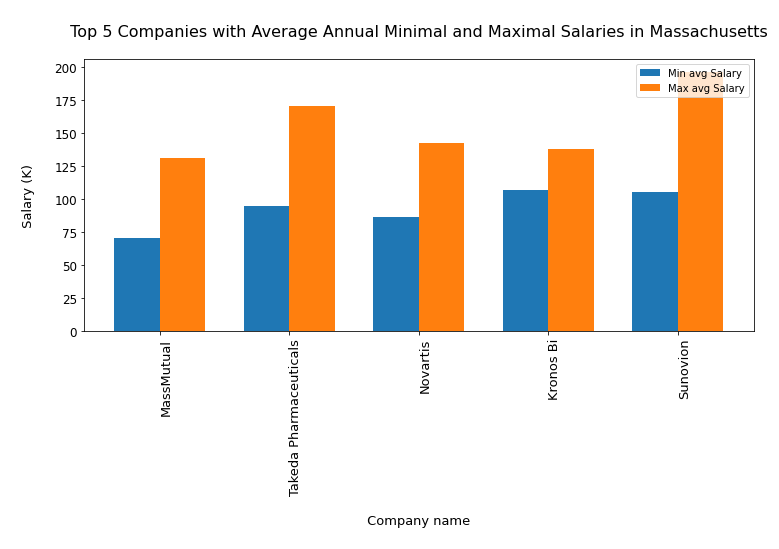

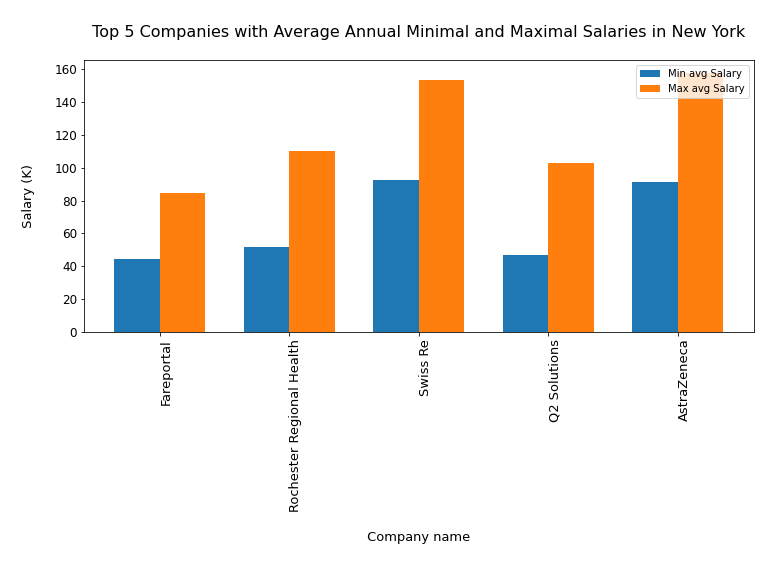

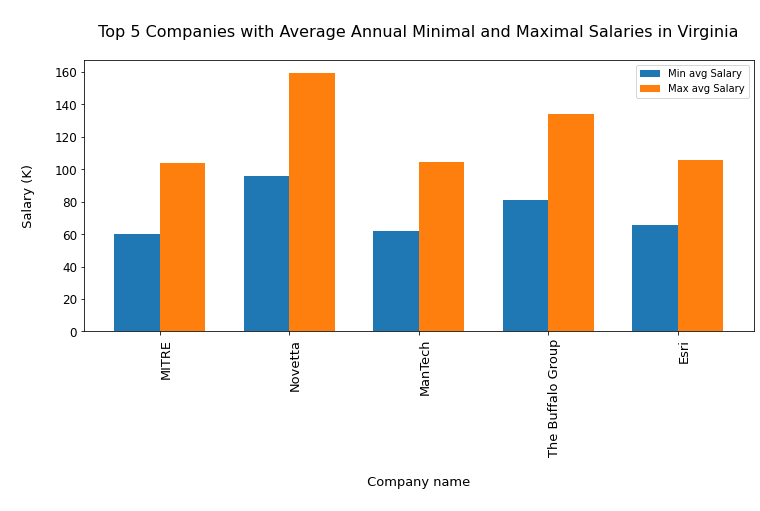

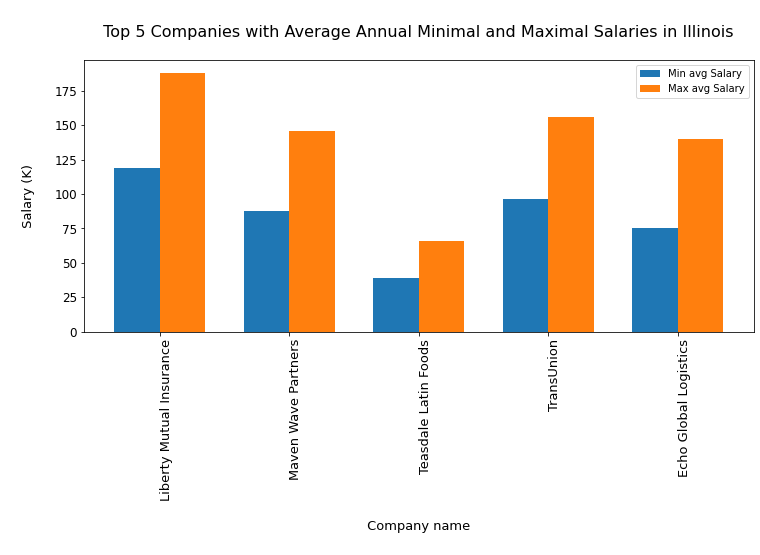

In [47]:
#@title
# Drawing the grouped bar plots.

#California

lab=[]
for it in s1[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ca["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ca["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in California \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Massachusetts

lab=[]
for it in s2[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ma["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ma["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Massachusetts \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#New York

lab=[]
for it in s3[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ny["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ny["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in New York \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Virginia

lab=[]
for it in s4[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, va["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, va["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Virginia \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

#Illinois

lab=[]
for it in s5[0:5]:
  lab.append(it)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, il["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, il["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries in Illinois \n',size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

- California
  42. Greentech has the highest minimal and maximal annual salary among top 5 companies with highest no. of job postings. It is followed by Central California Alliance for Health.
- Massachusetts
  43. Takeda Pharmaceuticals has the highest maximal annual salary. It is followed by Novaritis.
  44. Kronos Bi has the highest minimal annual salary, followed by Takeda Pharmaceuticals.
- New York
  45. AstraZeneca has the highest maximal annual salary. It if followed by Rochester Regional Health.
  46. Swiss Re has the highest minimal annual salary, followed by AstraZeneca.
- Virginia
  47. Novetta has the highest maximal and minimal annual salary.
-Illinois
  48. Liberty Mutual Insurance has the highest maximal and minimal annual salary, followed by TransUnion.

Lets try to find any relation between company size,revenue and salary offered by the company.

In [48]:
sz = df.groupby("Size")["Lower Salary","Upper Salary","Avg Salary(K)"].mean().sort_values("Avg Salary(K)",ascending=False)
sz = sz.drop("unknown",axis=0) # Dropping unknown company size records
sz

,Lower Salary,Upper Salary,Avg Salary(K)
Size,,,
10000+,83.661538,141.946154,112.803846
51 - 200,84.468085,139.074468,111.771277
1 - 50,78.580645,131.548387,105.064516
201 - 500,72.136752,128.358974,100.247863
5001 - 10000,70.421053,124.552632,97.486842
1001 - 5000,68.953333,120.426667,94.690000
501 - 1000,66.865672,116.141791,91.503731


Lets visualize this.

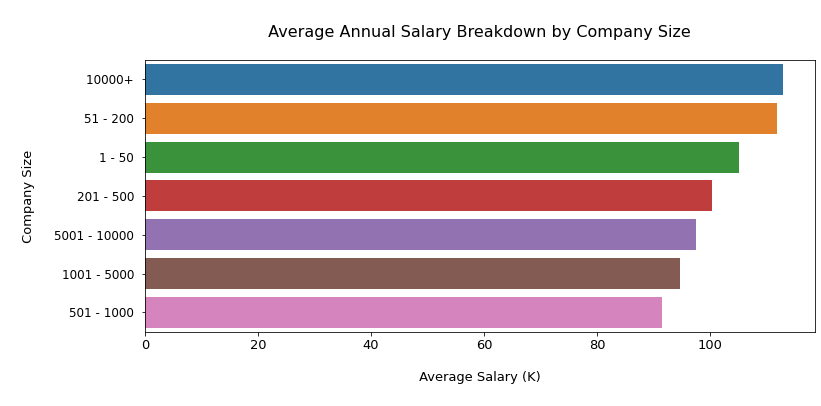

In [49]:
# Plotting company employee size v/s average annual salary.

sns.barplot(y= sz.index,x=sz["Avg Salary(K)"])
#Beautifying the plot

plt.title('\n Average Annual Salary Breakdown by Company Size \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n Company Size \n', fontsize=13, color='black')
plt.show()

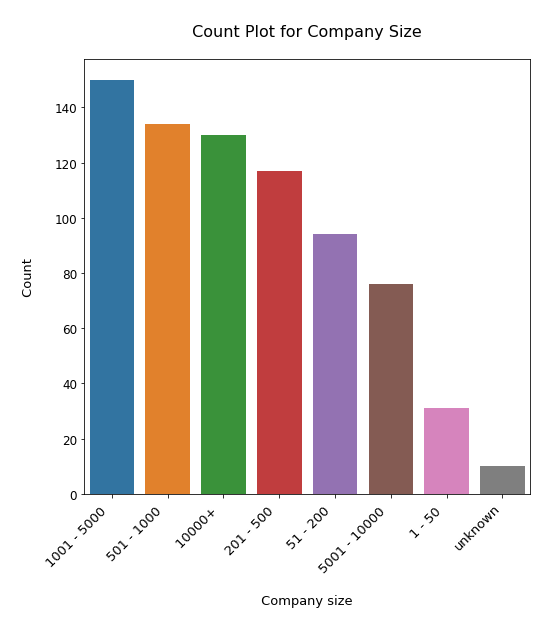

In [50]:
#Looking at the count of companies w.r.t. their size.

plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)

#Beautifying the plot

plt.title('\n Count Plot for Company Size \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=45, horizontalalignment='right')
plt.yticks(fontsize=12)
plt.xlabel('\n Company size \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

49. Ofcourse, companies with the largest number of employees offers high salary. There are more than 120 such companies in the data set.
50. Also, company size between 51-200 offers almost the same salary as the largest company.  There are less than 120 such companies in the data set.
51. Not surprisingly, companies having less than 50 employee offers the third best salary. These are usally startups. There are less number of such startups in the dataset.
52. Even though companies having 501-5000 employees are most common (more than 250 companies) in the dataset but they offer the least amount of salary.

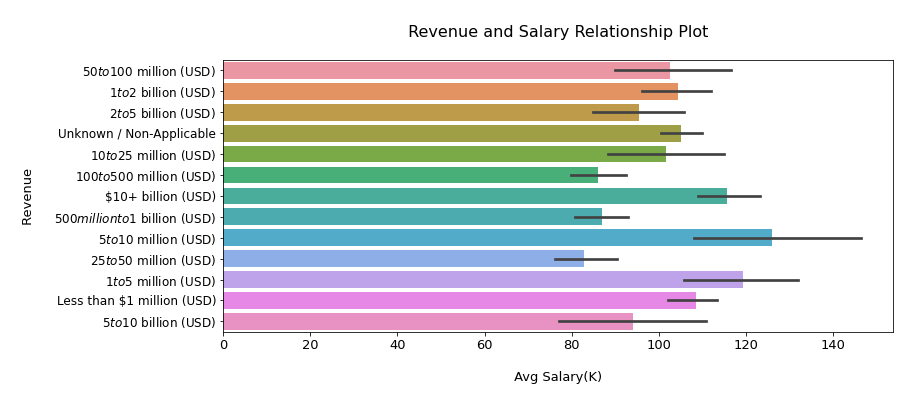

In [51]:
# looking at the relation between company size and revenue
sns.barplot(y="Revenue",x="Avg Salary(K)",data=df)

#Beautifying the plot

plt.title('\n Revenue and Salary Relationship Plot \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Avg Salary(K) \n', fontsize=13, color='black')
plt.ylabel('\n Revenue \n', fontsize=13, color='black')
plt.show()

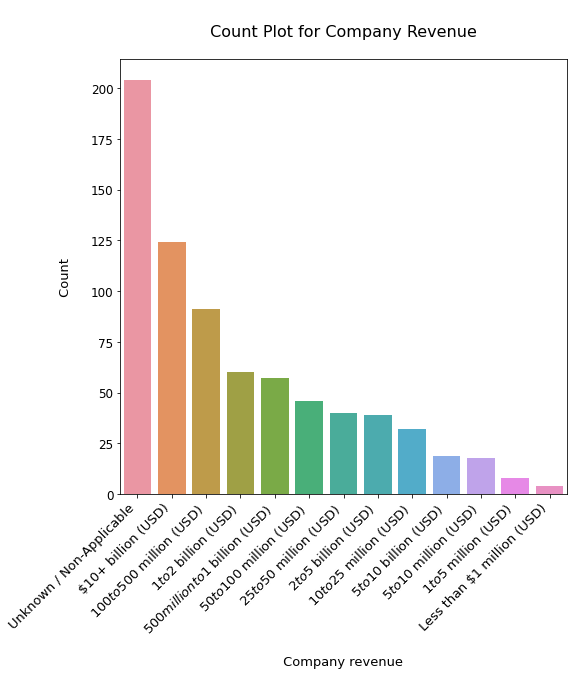

In [52]:
#Looking at the count of companies w.r.t. their revenue.

plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)

#Beautifying the plot

plt.title('\n Count Plot for Company Revenue \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=45, horizontalalignment='right')
plt.yticks(fontsize=12)
plt.xlabel('\n Company revenue \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

53. Suprising companies having revenue between 5-10 Million pays more salary, followed by companies with revenue between 1-g Million and companies with revenue more than 10 Billion. Looking at the count plot, there are about 20 companies with revenue between 5 and 10 Million, so it can't be fake.

Note: Unknown means that the data was not present for scrapping.

Lets look at the company age relation with revenue and size.

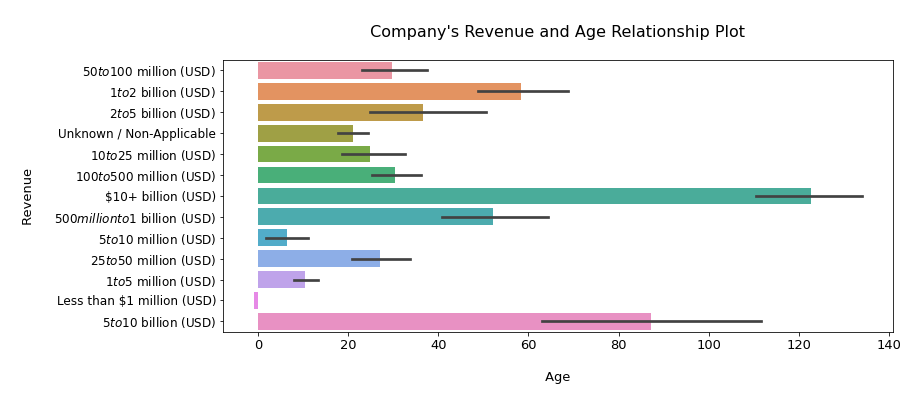

In [53]:
# Looking at the relation between company's age and revenue
sns.barplot(x="Age",y="Revenue",data=df)
#Beautifying the plot

plt.title('\n Company\'s Revenue and Age Relationship Plot \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Revenue \n', fontsize=13, color='black')
plt.show()

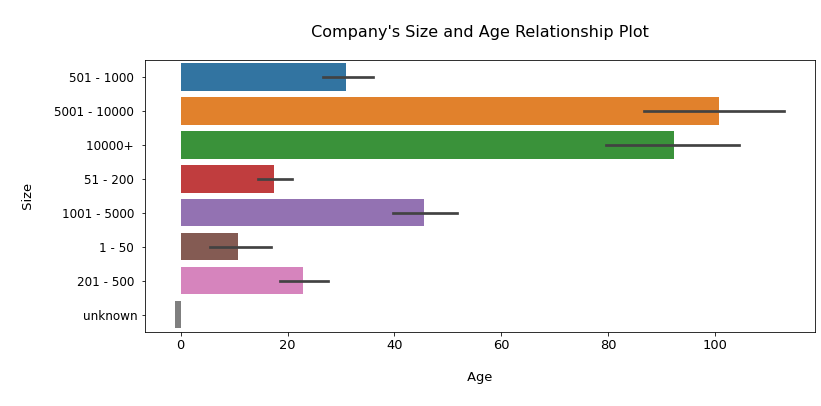

In [54]:
# Looking at the relation between company's age and size
sns.barplot(x="Age",y="Size",data=df)
#Beautifying the plot

plt.title('\n Company\'s Size and Age Relationship Plot \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Size \n', fontsize=13, color='black')
plt.show()

54. Clearly, old companies are larger in size. There are around 17% companies that are older than 100 years and make revenue of $10+ billion.
55. Similar thing can be seen for company size and age. 

## 6. Job Titles with Most Number of Jobs

Lets look at the most in demand job titles.

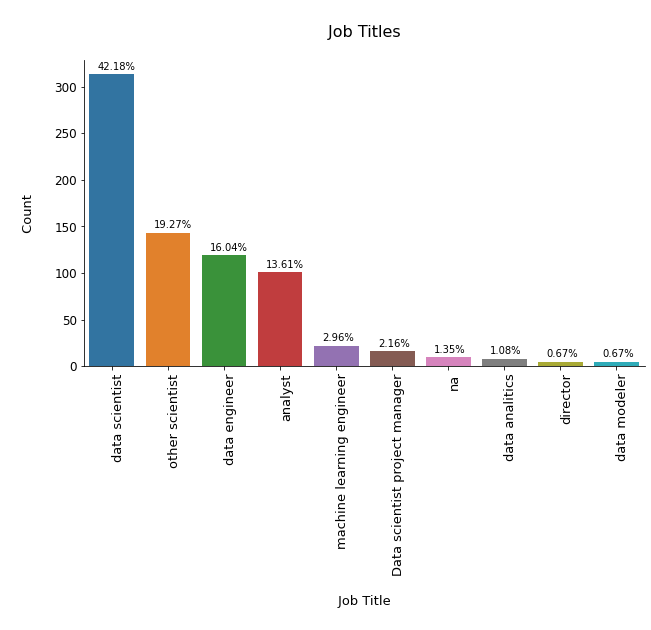

In [55]:
# Looking at the most in demand job titles.

catp = sns.catplot(x="job_title_sim",data=df,order=df.job_title_sim.value_counts().index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df.job_title_sim.value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#na shows those titles other than the titles shown in the plot.

56. A large number of job postings are for Data Scientist, followed by other scientists (research scientists, consultants etc) and data engineer.
57. Data scientist, data engineer and data analyst accounts for around 72% of the postings.
58. Surprisingly ML engineers are in low demand. It will be interesting to see who gets paid more.

Lets take a look at how these job positions are getting paid with respect to different seniority levels.

In [56]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Latitude,Longitude
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,34.166232,-106.026069


In [57]:
#Drawing a pivot table.
pd.pivot_table(df,index=["job_title_sim","seniority_by_title"],values="Avg Salary(K)")

Avg Salary(K)
job_title_sim                  seniority_by_title               
Data scientist project manager na                      73.218750
analyst                        jr                      53.250000
                               na                      61.215278
                               sr                      80.129630
data analitics                 na                      69.250000
data engineer                  na                      96.701220
                               sr                     124.689189
data modeler                   na                      77.500000
data scientist                 jr                     106.500000
                               na                     110.191038
                               sr                     135.590000
director                       na                     130.800000
machine learning engineer      na                     119.133333
                               sr                     142.071429
na                             na                      91.062500
                               sr                      93.000000
other scientist                na                      76.421875
                               sr                     111.819149

59. Senior ML Engineer is getting the highest salary while normal ML Engineer are paid ~20% less. It is followed by senior data scientist which are earning ~28% more than a Junior data scientist.
60. A senior data analyst is getting ~78% less salary than a senior ML engineer and ~70% less than a senior data scientist.
61. A senior data engineer is getting ~15% less salary than a senior ML engineer and ~9% less than a senior data scientist.

Note: na means job seniority level was not mentioned in the job description.

Next, I take a look at these job titles in top 5 states which have maximum number of job postings.

In [58]:
#@title Before Visualization code
# I need to first find the top 5 companies with maximum job postings in those states.

a1=df[df["Job Location"]=="CA"].copy() # It will only copy those records where Job Location is CA.
s1 = a1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for a1.

b1=df[df["Job Location"]=="MA"].copy() # It will only copy those records where Job Location is MA.
s2 = b1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for b1.

c1=df[df["Job Location"]=="NY"].copy() # It will only copy those records where Job Location is NY.
s3 = c1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for c1.

d1=df[df["Job Location"]=="VA"].copy() # It will only copy those records where Job Location is VA.
s4 = d1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for d1.

e1=df[df["Job Location"]=="IL"].copy() # It will only copy those records where Job Location is IL.
s5 = e1["job_title_sim"].value_counts().sort_values(ascending=False).index #This will act as a sorter for e1.

#Making a DF and sortring it w.r.t. s1
ca = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ca = ca.reset_index()

# Converting company_txt column as Category and setting the sorter.

ca["job_title_sim"] = ca["job_title_sim"].astype("category")
ca["job_title_sim"].cat.set_categories(s1, inplace=True)

#Resetting and droping the index

ca = ca.sort_values(["job_title_sim"]).reset_index()
ca = ca.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s2
ma = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ma = ma.reset_index()

# Converting company_txt column as Category and setting the sorter.

ma["job_title_sim"] = ma["job_title_sim"].astype("category")
ma["job_title_sim"].cat.set_categories(s2, inplace=True)

#Resetting and droping the index

ma = ma.sort_values(["job_title_sim"]).reset_index()
ma = ma.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s3
ny = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
ny = ny.reset_index()

# Converting company_txt column as Category and setting the sorter.

ny["job_title_sim"] = ny["job_title_sim"].astype("category")
ny["job_title_sim"].cat.set_categories(s3, inplace=True)

#Resetting and droping the index

ny = ny.sort_values(["job_title_sim"]).reset_index()
ny = ny.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s4
va = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
va = va.reset_index()

# Converting company_txt column as Category and setting the sorter.

va["job_title_sim"] = va["job_title_sim"].astype("category")
va["job_title_sim"].cat.set_categories(s4, inplace=True)

#Resetting and droping the index

va = va.sort_values(["job_title_sim"]).reset_index()
va = va.drop("index",axis=1)


#Making a DF and sortring it w.r.t. s5
il = df.groupby("job_title_sim")["Avg Salary(K)"].mean().sort_values(ascending=False)
il = il.reset_index()

# Converting company_txt column as Category and setting the sorter.

il["job_title_sim"] = il["job_title_sim"].astype("category")
il["job_title_sim"].cat.set_categories(s5, inplace=True)

#Resetting and droping the index

il = il.sort_values(["job_title_sim"]).reset_index()
il = il.drop("index",axis=1)


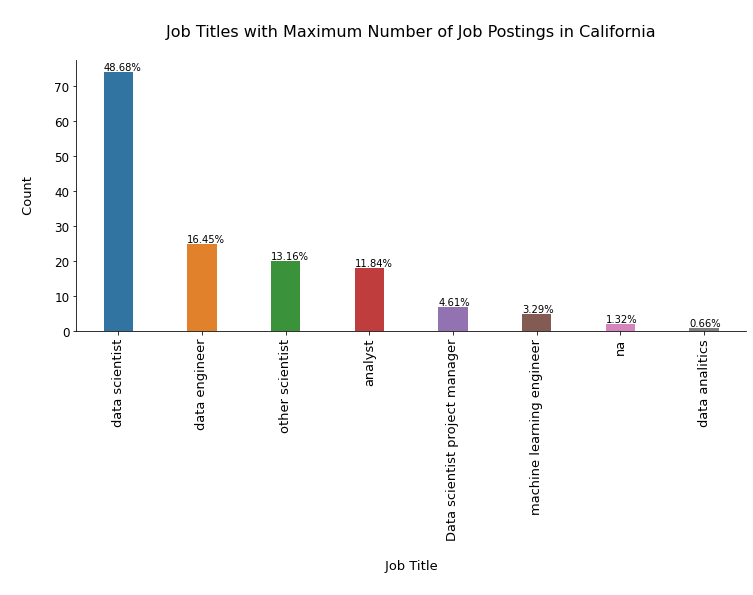

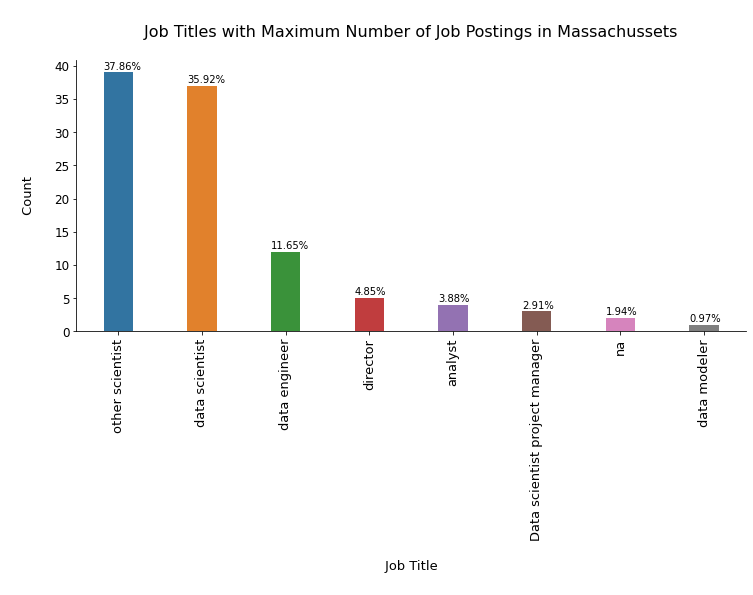

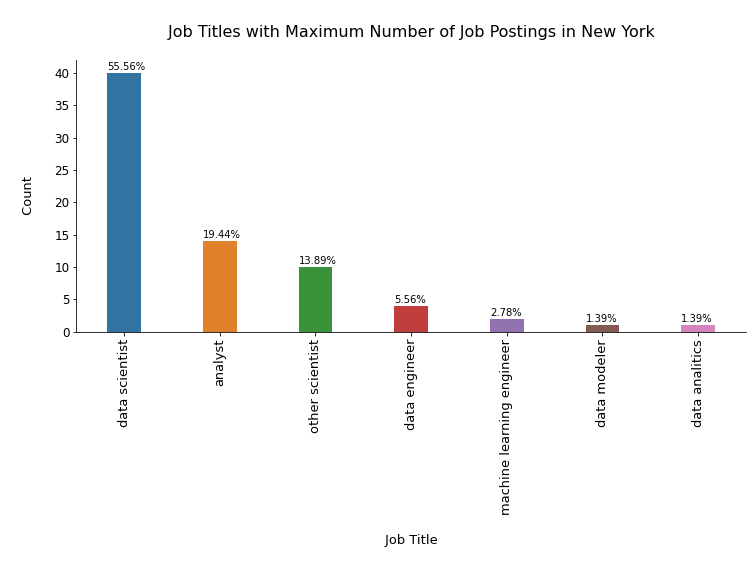

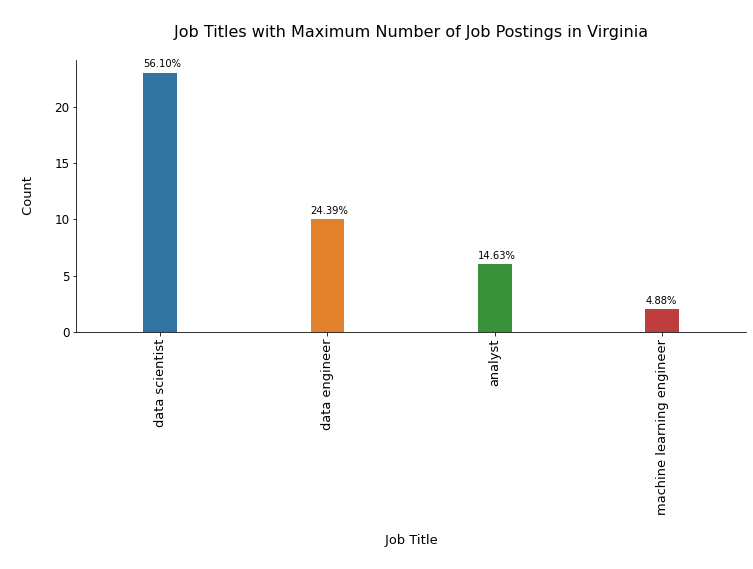

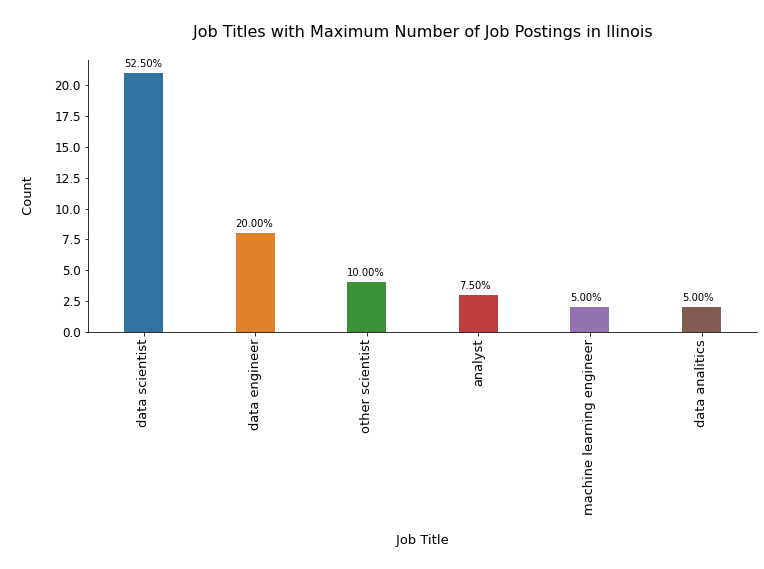

In [59]:
#@title
# Viualizing the above information

from IPython.core.pylabtools import figsize
#Lets visualize the top 5 job titles with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= a1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= a1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="CA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in California \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Massachussets

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= b1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= b1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="MA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Massachussets \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#New York
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= c1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= c1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="NY"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in New York \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Virginia
width = 0.35
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= d1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= d1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .20)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="VA"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Virginia \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

#Ilinois

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= e1["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10] ,y= e1["job_title_sim"].value_counts().sort_values(ascending=False).head(10))

#funtion to set width to 0.35
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/df[df["Job Location"]=="IL"].shape[0])*100))

#Beautifying the plot
plt.title('\n Job Titles with Maximum Number of Job Postings in Ilinois \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

- California
  62. Almost 50% of the job postings are for Data Scientist position, followed by Data Engineer (~17%).
  63. Data Scientist, Data Engineer and Data Analyst accounts for ~77% of the job postings. If we add Other Scientists job title in it, the percentage becomes more than 90%.
- Massachusetts
  64. Almost 50% of the job postings are for Other Scientists (e.g. research scientists) position, followed by Data scientists (~36%).
  65. Other Scientists and Data Scientists positions alone accounts for ~74% of the job postings.
- New York
  66. Almost 56% of the job postings are for Data Scientist position, followed by Data Analyst (~20%).
  67. Unlike California and Massachusetts, Data analyst is high in demand.
  68. Data Scientists and Data Analyst accounts for 75% of the job postings in this state.
- Virginia
  69. Only 4 job title postings are available in this state i.e. Data Scientist, Data Engineer, Data Analyst and ML engineer.
  70. Almost 56% of the job postings are for Data Scientist position, followed by Data Engineer (~25%).
  71. Data Scientists and Data Engineer accounts for ~81% of the job postings in this state.
-Illinois
  72. Almost 53% of the job postings are for Data Scientist position, followed by Data Engineer (20%).
  73. Data Scientists, Other Scientists and Data Engineer accounts for ~83% of the job postings in this state.

Next, it is interesting to look at the salary of top job titles in demand. I will be looking at Data Scientists, Data Engineer, ML Engineer and Data Analyst.
Other Scientists Title contains multiple job titles in it, this could be a little confusing. That's why, I will not look at it.

## 7. Salary of Job Titles with Most Number of Jobs

In [60]:
salary=["Avg Salary(K)"]

In [61]:
df.groupby('job_title_sim')[salary].mean().sort_values("Avg Salary(K)",ascending=False)

,Avg Salary(K)
job_title_sim,
director,130.800000
machine learning engineer,126.431818
data scientist,118.293930
data engineer,105.403361
na,91.450000
other scientist,88.055944
data modeler,77.500000
Data scientist project manager,73.218750
data analitics,69.250000


74. Data Science Director is the most paying job in the dataset, followed by ML Engineer, Data Scientist, Data Engineer and Data Analyst.
75. Even though ML Engineer was not in demand in most of the states, it still gets highly paid.

I will now look at the salary of Data Scientist, Data Engineer, Data Analyst, ML Engineer in different states.
I am not taking Data Science Director here because it is only present in 5 records out of 742, I don't find it much relevant here.

In [62]:
#@title
#Data scientist
ds = df[df["job_title_sim"]=="data scientist"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Data Engineer
de = df[df["job_title_sim"]=="data engineer"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Data Analyst
da = df[df["job_title_sim"]=="analyst"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

#Machine Learning Engineer
mle = df[df["job_title_sim"]=="machine learning engineer"].groupby("Job Location")[salary].mean().sort_values("Avg Salary(K)",ascending=False)[0:10]

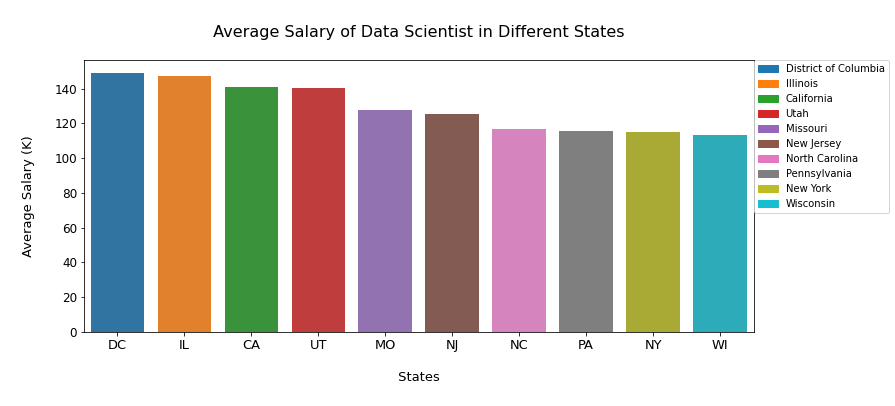

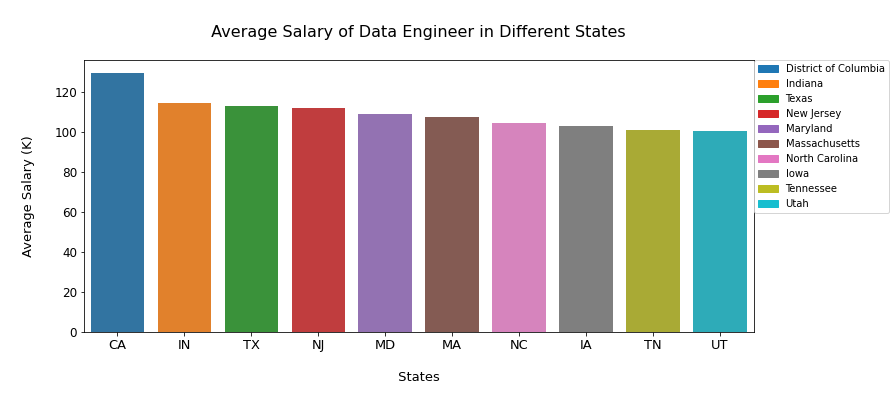

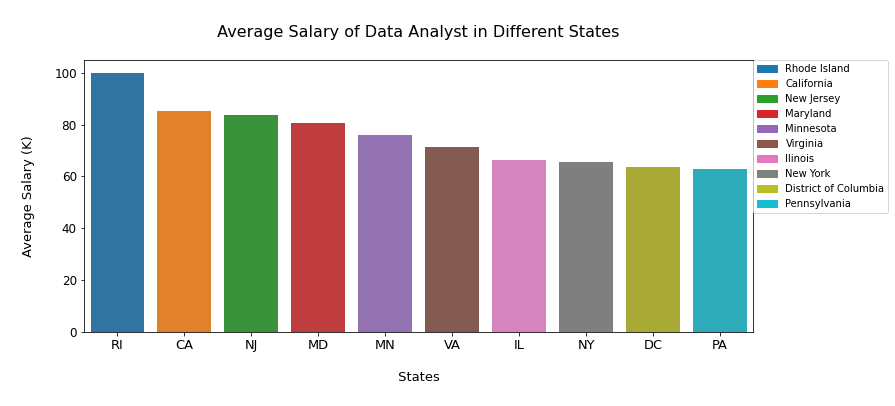

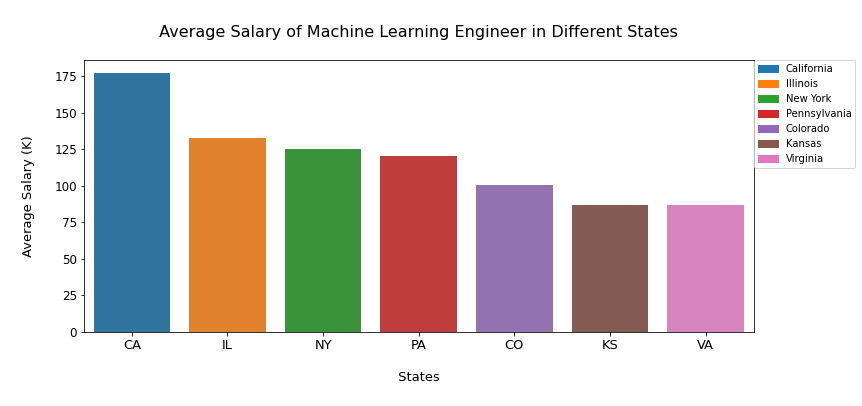

In [63]:
#@title
lab=["District of Columbia","Illinois","California","Utah","Missouri","New Jersey","North Carolina","Pennsylvania","New York","Wisconsin"]

#Plot for Data Scientist

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= ds.index, y = ds["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Scientist in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot for Data Engineer
lab=["District of Columbia","Indiana","Texas","New Jersey","Maryland","Massachusetts","North Carolina","Iowa","Tennessee","Utah"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= de.index, y = de["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


#Plot for Data Analyst
lab=["Rhode Island","California","New Jersey","Maryland","Minnesota","Virginia","Ilinois","New York","District of Columbia","Pennsylvania"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= da.index, y = da["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Analyst in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()


#Plot for Machine Learning Engineer
lab=["California","Illinois","New York","Pennsylvania","Colorado","Kansas","Virginia"]

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= mle.index, y = mle["Avg Salary(K)"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Machine Learning Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()

- Data Scientist
  76. District of Columbia (DC) offers highest average annual salary to Data Scientist, followed by Ilinois (IL) ,California (CA). I was expecting CA on the top, mainly because California has the highest average annual salary in general (look at plot "Average salary per annum for different states").
- Data Engineer

  77. California offers the highest salary for Data Engineer, followed by Indiana and Texas.
- Data Analyst

  78. Surprisingly, Rhode Island offers the highest salary to a Data Analyst, followed by California.
- Machine Learning Engineer

  79. California offers the highest salary for ML Engineer, followed by Illinois and New York.



Some of the insights are surprising, I doubt their reliability. It is better to look at the no. of records supporting the insights for each job titles.

In [64]:
# To show all the records
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

pd.pivot_table(df, index = ['Job Location','job_title_sim'], values = 'Avg Salary(K)', aggfunc = 'count').sort_values('Job Location', ascending = False)


Avg Salary(K)
Job Location job_title_sim                                
WI           other scientist                             4
             data scientist                              3
             analyst                                     3
WA           other scientist                             1
             data scientist                             17
             analyst                                     3
VA           machine learning engineer                   2
             data scientist                             23
             data engineer                              10
             analyst                                     6
UT           data scientist                              3
             data engineer                               3
             analyst                                     4
TX           data engineer                               8
             data scientist                             13
             other scientist                             7
TN           data scientist                              1
             data engineer                              10
             analyst                                     2
SC           other scientist                             1
RI           analyst                                     1
PA           other scientist                             6
             machine learning engineer                   7
             data scientist                             10
             data engineer                               1
             analyst                                     8
             Data scientist project manager              1
OR           data scientist                              3
             data engineer                               1
OH           data scientist                              7
             analyst                                     4
             other scientist                             3
NY           other scientist                            10
             machine learning engineer                   2
             data scientist                             40
             data modeler                                1
             data engineer                               4
             data analitics                              1
             analyst                                    14
NM           data scientist                              3
NJ           Data scientist project manager              2
             other scientist                             1
             data scientist                              6
             data engineer                               2
             analyst                                     6
NE           other scientist                             4
NC           other scientist                            12
             data scientist                              3
             data engineer                               6
MO           other scientist                             1
             na                                          2
             data scientist                              3
             analyst                                     2
             Data scientist project manager              1
MN           data engineer                               1
             analyst                                     1
MI           data scientist                              4
             Data scientist project manager              2
MD           other scientist                            12
             data scientist                             13
             na                                          3
             data modeler                                1
             data engineer                               3
             analyst                                     3
MA           other scientist                            39
             na                                          2
             director            

- Data Scientist
  80. DC only has 5 records for Data Scientist job position while CA has 74 and Ilinois has 21, it doesn't look like DC has enough records to be considered a solid insight.

- Data Engineer
  81. CA has 25 records to support the insight. It is fine to consired that CA offers the highest salary to data engineer.

- Data Analyst
  82. Rhode Island has only 1 record that supports the insight, it is not a solid finding to say that RI offers the highest salary to data analyst.

- Machine Learning Engineer
  83. There aren't enough records to conclude anything.

## 8. Skills Required by Companies for Each Job Title.

I will look at the average salary and no of time that skill appears in the job description for each job title.

In [65]:
df_pivots = df[['job_title_sim','Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]


In [66]:
# Checking Average Salary  and counts for each skills
skills = ['Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']
for i in skills:
  a = pd.pivot_table(df_pivots, index = 'job_title_sim', columns = i, values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})
  print(a)

                               Avg Salary(K)              count       
Python                                     0           1      0      1
job_title_sim                                                         
Data scientist project manager     69.833333   83.375000   12.0    4.0
analyst                            61.385714   76.790323   70.0   31.0
data analitics                     62.500000   73.300000    3.0    5.0
data engineer                     105.488095  105.357143   42.0   77.0
data modeler                       94.833333   51.500000    3.0    2.0
data scientist                    112.315068  120.112500   73.0  240.0
director                          130.800000         NaN    5.0    NaN
machine learning engineer         124.000000  126.972222    4.0   18.0
na                                 78.250000  111.250000    6.0    4.0
other scientist                    85.496212  118.772727  132.0   11.0
                               Avg Salary(K)              count      
spark  

- Python
  84. We see that job positions in which python skill is mentioned in the job description are getting paid more.
  85. Also, Python skill is required in about 77%, 31%, 65% and 82% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- AWS
  86. We see that job positions in which AWS skill is mentioned are getting paid more.
  87. Also, this skill is required in about 25%, 9%, 50% and 27% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Excel
  88. Surprisingle, less salary for job postings in which Excel skill is mentioned.
  89. Also, this skill is required in about 50%, 76%, 45% and 32% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- SQL
  90. Not much relation between the skill and the average annual salary for different job positions.
  91. Also, this skill is required in about 56%, 74%, 73% and 59% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- SAS
  92. Not much relation between the skill and the average annual salary for different job positions.
  93. Also, this skill is required in about 16%, 11%, 0% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Hadoop
  94. Not much relation between the skill and the average annual salary for different job positions.
  95. Also, this skill is required in about 19%, NA, 42% and 18% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Tableau
  96. Not much relation between the skill and the average annual salary for different job positions.
  97. Also, this skill is required in about 24%, 39%, 0.1% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- PowerBi
  98. Not much relation between the skill and the average annual salary for different job positions.
  99. Also, this skill is required in about 0.1%, 16%, 0% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- MangoDB
  100. Not much relation between the skill and the average annual salary for different job positions.
  101. Also, this skill is required in about 0.06%, 0.02%, 0.1% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Google Analytics Certificate
  102. Not much relation between the skill and the average annual salary for different job positions.

- Spark, Keras, Pytorch, Scikit, Tensor, Flink
  103. In most of the job postings, these skills aren't mentioned.



## 9. Relation between Average Salary and Education

Lets take a look at how many job postings gives experience credits to candidates holding a Phd or a Masters degree.

In [67]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Latitude,Longitude
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,34.166232,-106.026069


In [68]:
pd.pivot_table(df, index = 'job_title_sim', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})


Avg Salary(K)              ... count       
Degree                                     M           P  ...     P     na
job_title_sim                                             ...             
Data scientist project manager     83.800000         NaN  ...   NaN   11.0
analyst                            61.333333         NaN  ...   NaN   74.0
data analitics                     82.500000         NaN  ...   NaN    5.0
data engineer                     103.714286  132.250000  ...   2.0   82.0
data modeler                       63.166667         NaN  ...   NaN    2.0
data scientist                    117.847826  129.578947  ...  38.0  137.0
director                                 NaN  150.666667  ...   3.0    2.0
machine learning engineer         125.000000  134.200000  ...  10.0   10.0
na                                 92.000000         NaN  ...   NaN    6.0
other scientist                   102.771429  100.509259  ...  54.0   54.0

[10 rows x 6 columns]

104. Most of the companies has mentioned Masters degree in their job descriptions.
105. For companies that mentioned a PhD degree in their job description, they offered much highes average annual salary as compared to Masters.

At last, Lets make a word cloud from job description column to see which words are most common in the column.

In [69]:
#@title
import nltk
nltk.download("popular") 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [70]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

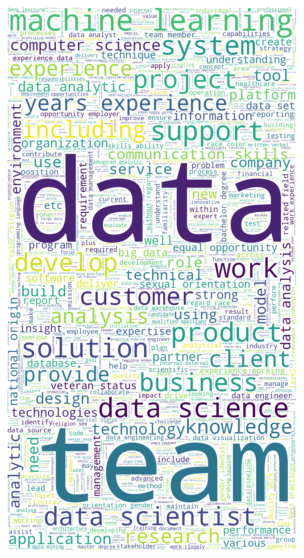

In [71]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

## Insights

1. Average lower salary is about \$75K pa. We see 75% of the jobs positing has minimum salary =< than \$91K pa, so it doesn't look like the mean value is affected much by the outlier( \$15K or \$202K pa).
2. Average maximum salary is around \$128K pa. We see 75% of the jobs positing has maximum salary =< than \$155K pa, so it doesn't look like the mean value is affected much by the outlier(\$16K or \$306K pa).
3. Mean Avg. salary is about \$101K pa.
4. Most of the companies are rated between 3.5 - 4 (~3.7).
5. It shows there are many outliners in the Age column, so the mean value of Age can't be trusted as it will be clearly biased towards the outliers.
6. 37 unique states are present in the whole dataset, that's why we see 37 markers on the map.
7. Also, we see more point on the boundary of the country map becauise more people live in the coastal areas as compared to rest of the US.
8. California has the most number of jobs.
9. It is obvious for California to have most number of jobs as it is a hub for Tech. companies and has silicon valley.
10. Calfornia, Massachusetts, New York, Virginia together has around 50% jobs
11. Massachusetts on 2nd rank is no surprise, according to latest edition of the Milken Institute’s State and Technology Index, it has now become the tech state of US. Source: https://www.geekwire.com/2020/chart-new-report-ranks-top-states-tech/
12. One surprising thing is, despite having the largest number of Fortune 500 companies HQ in New York, it is still on 3rd position. later we noticed that it is because of low salary job titles job postings in this state.
13. State with highest number of job, California also offers the highest average maximal annual salary, followed by Illinois.
14. Both California and Illinois has almost the same average minimal annual salary.
15. Pennsylvania has the lowest average minimum annual salary among the top 10 states.
16. Washington has the lowest average maximum annual salary among the top 10 states.
17. California has the highest average annual salary, followed by Illinois. This could be beacuse there are 74 job postings in California for Data scientists which are highly paid (shown later).
18. Maryland has the lowest average annual salary because it is hiring less number of people and the jobs are also distributed among high salary and low salary job titles.
19. Average Salary of California is twice the average salary of Alabama, Delaware, South Carolina, Idaho, Louisiana and Nebraska.
20. California has the highest average annual salary among all 10 states, followed by Illinois.
21. Pennsylvania, Texas and Washington has almost the same annual average salary.
22. Only 3 out of 10 states, California, Massachusetts and Illinois, have average annual salary more than \$100K.
23. Overlap of 6/10 states between top 10 states reporting highest annual average salary and top 10 states where job postings are maximum. 
24. Even though District of Columbia, New Jersey, Michigan and Rhode Island are not in top 10 states with highest number of jobs, those states still offers an average annual salary of greater than \$ 100,000 .
25. Biotech & Pharmaceuticals Industry has maximum number of jobs followed by Insurance carriers.
26. As a surprise, IT industry has fewer jobs for data science related roles.
27. More than 65% data science related jobs lie in top 10 industries.
28. For this dataset, Biotech & Pharmaceuticals Industry has twice the amount of jobs compared to IT services industry.
29. It looks like Heath Care Services & Hospitals industry is hiring at a good rate because they almost surpassed the IT services industry.
30. Computer Hardware & Software Industry has the highest average maximal salary among the 5 selected industries, it is followed by Biotech & Pharmaceuticals.
31. Computer Hardware & Software Industry also has the highest average minimal salary among the 5 selected industries, it is followed by Biotech & Pharmaceuticals.
32. Health Care Services & Hospitals industry has the lowest average maximal and minimal salary among the 5 selected industries.
33. Telecommunications Manufacturing Industry has the lowest average minimum and maximum salary among all the industries.
34. Financial Analytics & Research industry has the highest average minimum salary among all the industries.
35. Motion Picture Production & Distribution industry has the highest average maximum salary among all the industries.
36. The average maximum salary of Motion Picture Production & Distribution industry is 3.3 times of the Telecommunications Manufacturing Industry's average maximum salary.
37. The average minimum salary of Financial Analytics & Research industry is 3.6 times of the Telecommunications Manufacturing Industry's average minimum salary.
38. There are total 342 companies in the dataset. This is why there is less number of job postings by each company.
39. Reynolds American, MassMutrual and Takeda Pharmaceuticals company tops the list with 14 job postings related to data science.
40. In the previous plot, we also saw that a Pharmaceutical Industry was leading with the most number of job postings, we see the same trend here in this findings too. The industry also offered the highest minimum and maximum annual salary. It clearly shows that the demand of data science experts in this industry is increasing.
41. Again, we see that a Pharmaceuticals Company offers the highest minimal and maximal annual salary.
- California
  42. Greentech has the highest minimal and maximal annual salary among top 5 companies with highest no. of job postings. It is followed by Central California Alliance for Health.
- Massachusetts
  43. Takeda Pharmaceuticals has the highest maximal annual salary. It is followed by Novaritis.
  44. Kronos Bi has the highest minimal annual salary, followed by Takeda Pharmaceuticals.
- New York
  45. AstraZeneca has the highest maximal annual salary. It if followed by Rochester Regional Health.
  46. Swiss Re has the highest minimal annual salary, followed by AstraZeneca.
- Virginia
  47. Novetta has the highest maximal and minimal annual salary.
-Illinois
  48. Liberty Mutual Insurance has the highest maximal and minimal annual salary, followed by TransUnion.
  49. Ofcourse, companies with the largest number of employees offers high salary. There are more than 120 such companies in the data set.
50. Also, company size between 51-200 offers almost the same salary as the largest company.  There are less than 120 such companies in the data set.
51. Not surprisingly, companies having less than 50 employee offers the third best salary. These are usally startups. There are less number of such startups in the dataset.
52. Even though companies having 501-5000 employees are most common (more than 250 companies) in the dataset but they offer the least amount of salary.
53. Suprising companies having revenue between 5-10 Million pays more salary, followed by companies with revenue between 1-g Million and companies with revenue more than 10 Billion. Looking at the count plot, there are about 20 companies with revenue between 5 and 10 Million, so it can't be fake.
54. Clearly, old companies are larger in size. There are around 17% companies that are older than 100 years and make revenue of $10+ billion.
55. Similar thing can be seen for company size and age. 
56. A large number of job postings are for Data Scientist, followed by other scientists (research scientists, consultants etc) and data engineer.
57. Data scientist, data engineer and data analyst accounts for around 72% of the postings.
58. Surprisingly ML engineers are in low demand. It will be interesting to see who gets paid more.
59. Senior ML Engineer is getting the highest salary while normal ML Engineer are paid ~20% less. It is followed by senior data scientist which are earning ~28% more than a Junior data scientist.
60. A senior data analyst is getting ~78% less salary than a senior ML engineer and ~70% less than a senior data scientist.
61. A senior data engineer is getting ~15% less salary than a senior ML engineer and ~9% less than a senior data scientist.
- California
  62. Almost 50% of the job postings are for Data Scientist position, followed by Data Engineer (~17%).
  63. Data Scientist, Data Engineer and Data Analyst accounts for ~77% of the job postings. If we add Other Scientists job title in it, the percentage becomes more than 90%.
- Massachusetts
  64. Almost 50% of the job postings are for Other Scientists (e.g. research scientists) position, followed by Data scientists (~36%).
  65. Other Scientists and Data Scientists positions alone accounts for ~74% of the job postings.
- New York
  66. Almost 56% of the job postings are for Data Scientist position, followed by Data Analyst (~20%).
  67. Unlike California and Massachusetts, Data analyst is high in demand.
  68. Data Scientists and Data Analyst accounts for 75% of the job postings in this state.
- Virginia
  69. Only 4 job title postings are available in this state i.e. Data Scientist, Data Engineer, Data Analyst and ML engineer.
  70. Almost 56% of the job postings are for Data Scientist position, followed by Data Engineer (~25%).
  71. Data Scientists and Data Engineer accounts for ~81% of the job postings in this state.
-Illinois
  72. Almost 53% of the job postings are for Data Scientist position, followed by Data Engineer (20%).
  73. Data Scientists, Other Scientists and Data Engineer accounts for ~83% of the job postings in this state.
  74. Data Science Director is the most paying job in the dataset, followed by ML Engineer, Data Scientist, Data Engineer and Data Analyst.
75. Even though ML Engineer was not in demand in most of the states, it still gets highly paid.
- Data Scientist
  76. District of Columbia (DC) offers highest average annual salary to Data Scientist, followed by Ilinois (IL) ,California (CA). I was expecting CA on the top, mainly because California has the highest average annual salary in general (look at plot "Average salary per annum for different states").
- Data Engineer

  77. California offers the highest salary for Data Engineer, followed by Indiana and Texas.
- Data Analyst

  78. Surprisingly, Rhode Island offers the highest salary to a Data Analyst, followed by California.
- Machine Learning Engineer

  79. California offers the highest salary for ML Engineer, followed by Illinois and New York.

- Data Scientist
  80. DC only has 5 records for Data Scientist job position while CA has 74 and Ilinois has 21, it doesn't look like DC has enough records to be considered a solid insight.

- Data Engineer
  81. CA has 25 records to support the insight. It is fine to consired that CA offers the highest salary to data engineer.

- Data Analyst
  82. Rhode Island has only 1 record that supports the insight, it is not a solid finding to say that RI offers the highest salary to data analyst.

- Machine Learning Engineer
  83. There aren't enough records to conclude anything.
- Python
  84. We see that job positions in which python skill is mentioned in the job description are getting paid more.
  85. Also, Python skill is required in about 77%, 31%, 65% and 82% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- AWS
  86. We see that job positions in which AWS skill is mentioned are getting paid more.
  87. Also, this skill is required in about 25%, 9%, 50% and 27% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Excel
  88. Surprisingle, less salary for job postings in which Excel skill is mentioned.
  89. Also, this skill is required in about 50%, 76%, 45% and 32% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- SQL
  90. Not much relation between the skill and the average annual salary for different job positions.
  91. Also, this skill is required in about 56%, 74%, 73% and 59% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- SAS
  92. Not much relation between the skill and the average annual salary for different job positions.
  93. Also, this skill is required in about 16%, 11%, 0% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Hadoop
  94. Not much relation between the skill and the average annual salary for different job positions.
  95. Also, this skill is required in about 19%, NA, 42% and 18% of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Tableau
  96. Not much relation between the skill and the average annual salary for different job positions.
  97. Also, this skill is required in about 24%, 39%, 0.1% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- PowerBi
  98. Not much relation between the skill and the average annual salary for different job positions.
  99. Also, this skill is required in about 0.1%, 16%, 0% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- MangoDB
  100. Not much relation between the skill and the average annual salary for different job positions.
  101. Also, this skill is required in about 0.06%, 0.02%, 0.1% and NA of the job postings for Data Scientist, Data Analyst, Data Engineer and ML Engineer job positions respectively.

- Google Analytics Certificate
  102. Not much relation between the skill and the average annual salary for different job positions.

- Spark, Keras, Pytorch, Scikit, Tensor, Flink
  103. In most of the job postings, these skills aren't mentioned.
104. Most of the companies has mentioned Masters degree in their job descriptions.
105. For companies that mentioned a PhD degree in their job description, they offered much highes average annual salary as compared to Masters.


> > > > ## Thank You :)


> > ## If You Like This Notebook, UpVote!!

